In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings("ignore")

In [43]:
online_course = pd.read_csv('online_course_engagement_data.csv')
online_course.head(6)

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0
5,8650,Health,79.466129,12,7,70.233329,76.484023,0,1


In [44]:
online_course.shape

(9000, 9)

In [45]:
online_course.describe()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,50.163822,10.024667,5.090556,74.706028,50.340146,0.500667,0.396444
std,2596.849433,28.491750,6.029878,3.157762,14.378383,28.950977,0.500027,0.489186
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,2251.750000,25.440548,5.000000,2.000000,62.283451,25.653614,0.000000,0.000000
50%,4483.500000,49.818417,10.000000,5.000000,74.743294,50.264124,1.000000,0.000000
75%,6751.250000,75.069924,15.000000,8.000000,87.022663,75.572493,1.000000,1.000000
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


In [46]:
online_course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


In [47]:
### checking for missing values

missing_vlaues = online_course.isna().sum()
missing_vlaues

UserID                   0
CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64

In [48]:
## continuos_data

continuos_data = online_course.select_dtypes(exclude='object')
continuos_data.head(6)

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,29.979719,17,3,50.365656,20.860773,1,0
1,4326,27.802640,1,5,62.615970,65.632415,1,0
2,5849,86.820485,14,2,78.458962,63.812007,1,1
3,4992,35.038427,17,10,59.198853,95.433162,0,1
4,3866,92.490647,16,0,98.428285,18.102478,0,0
5,8650,79.466129,12,7,70.233329,76.484023,0,1


In [49]:
## categorical data
categorical_data = online_course.select_dtypes(include='object')
categorical_data.head(6)

,CourseCategory
0,Health
1,Arts
2,Arts
3,Science
4,Programming
5,Health


<Axes: >

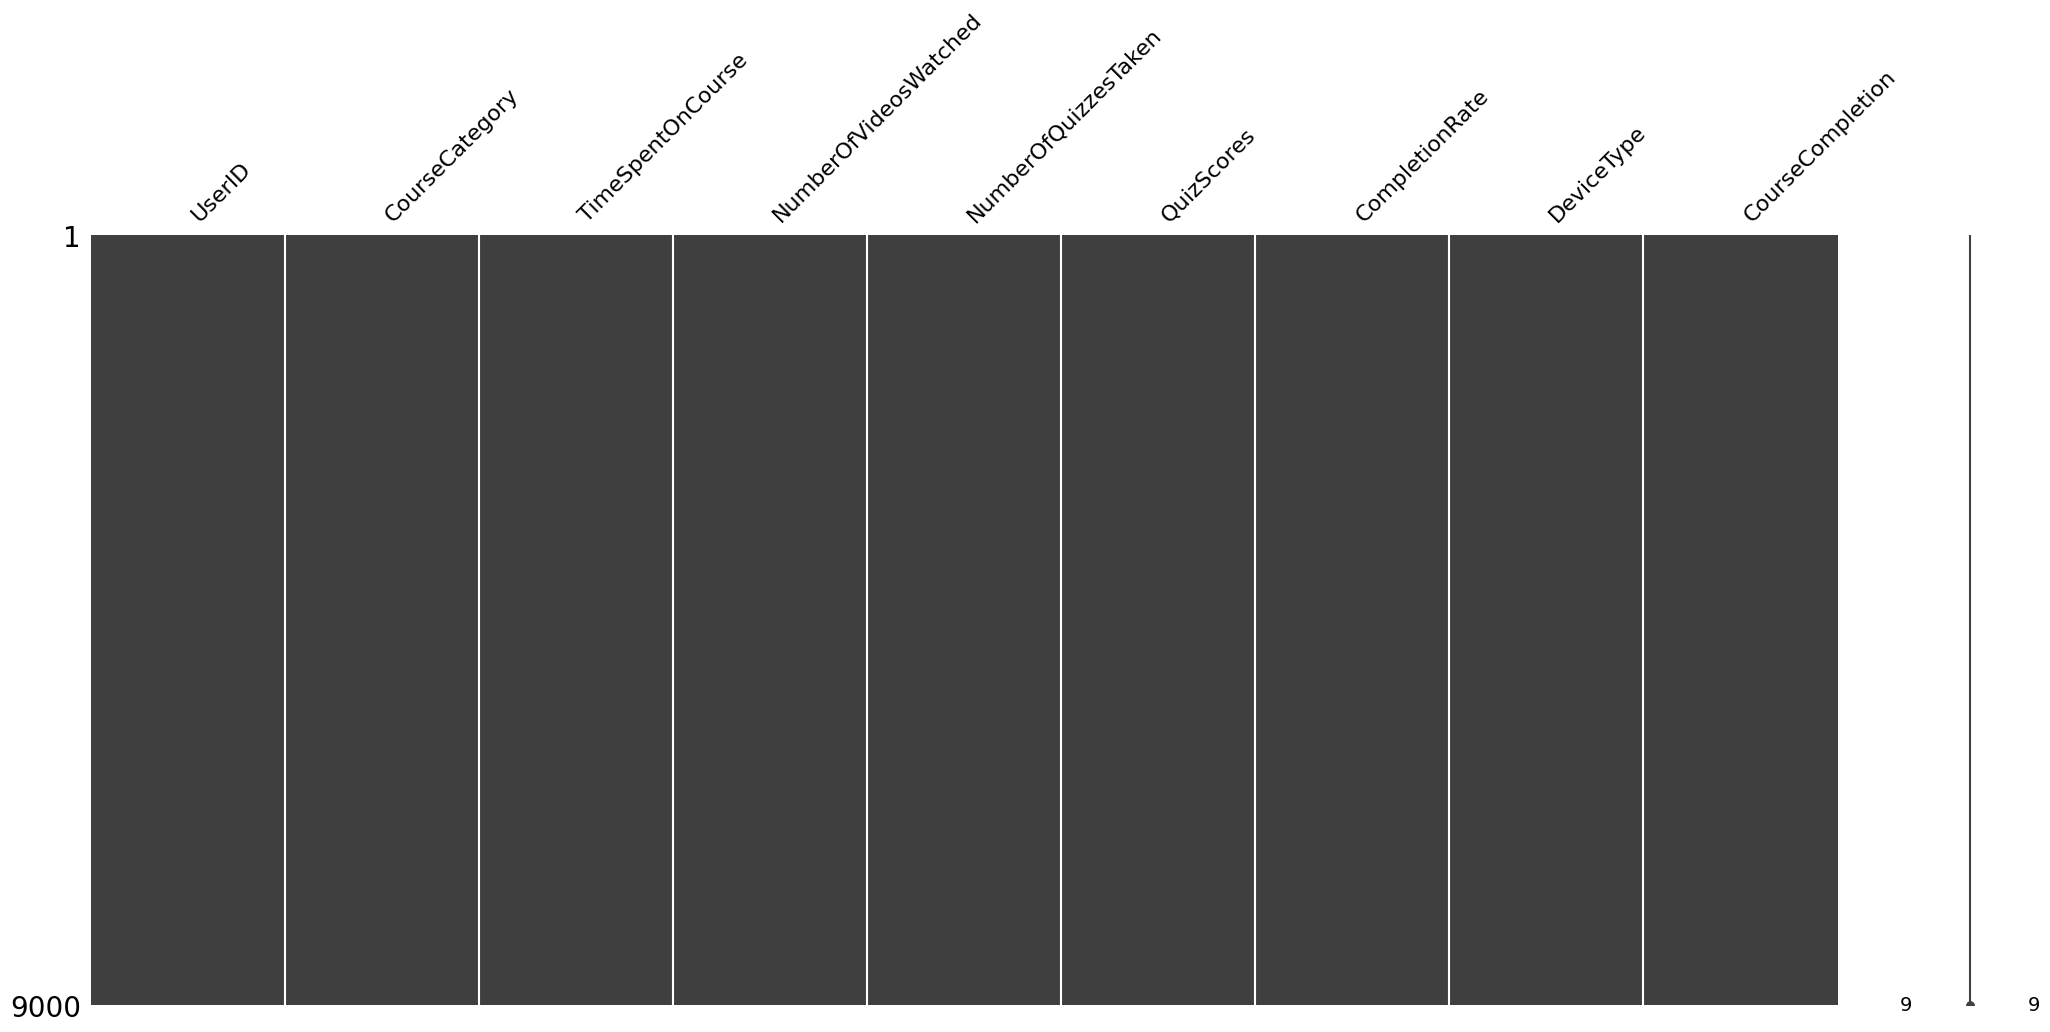

In [50]:
msno.matrix(online_course)

- Dropping the userID column because it just a count

In [51]:
# online_course = online_course.drop(columns=['UserID'])

In [52]:
online_course.head(6)

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0
5,8650,Health,79.466129,12,7,70.233329,76.484023,0,1


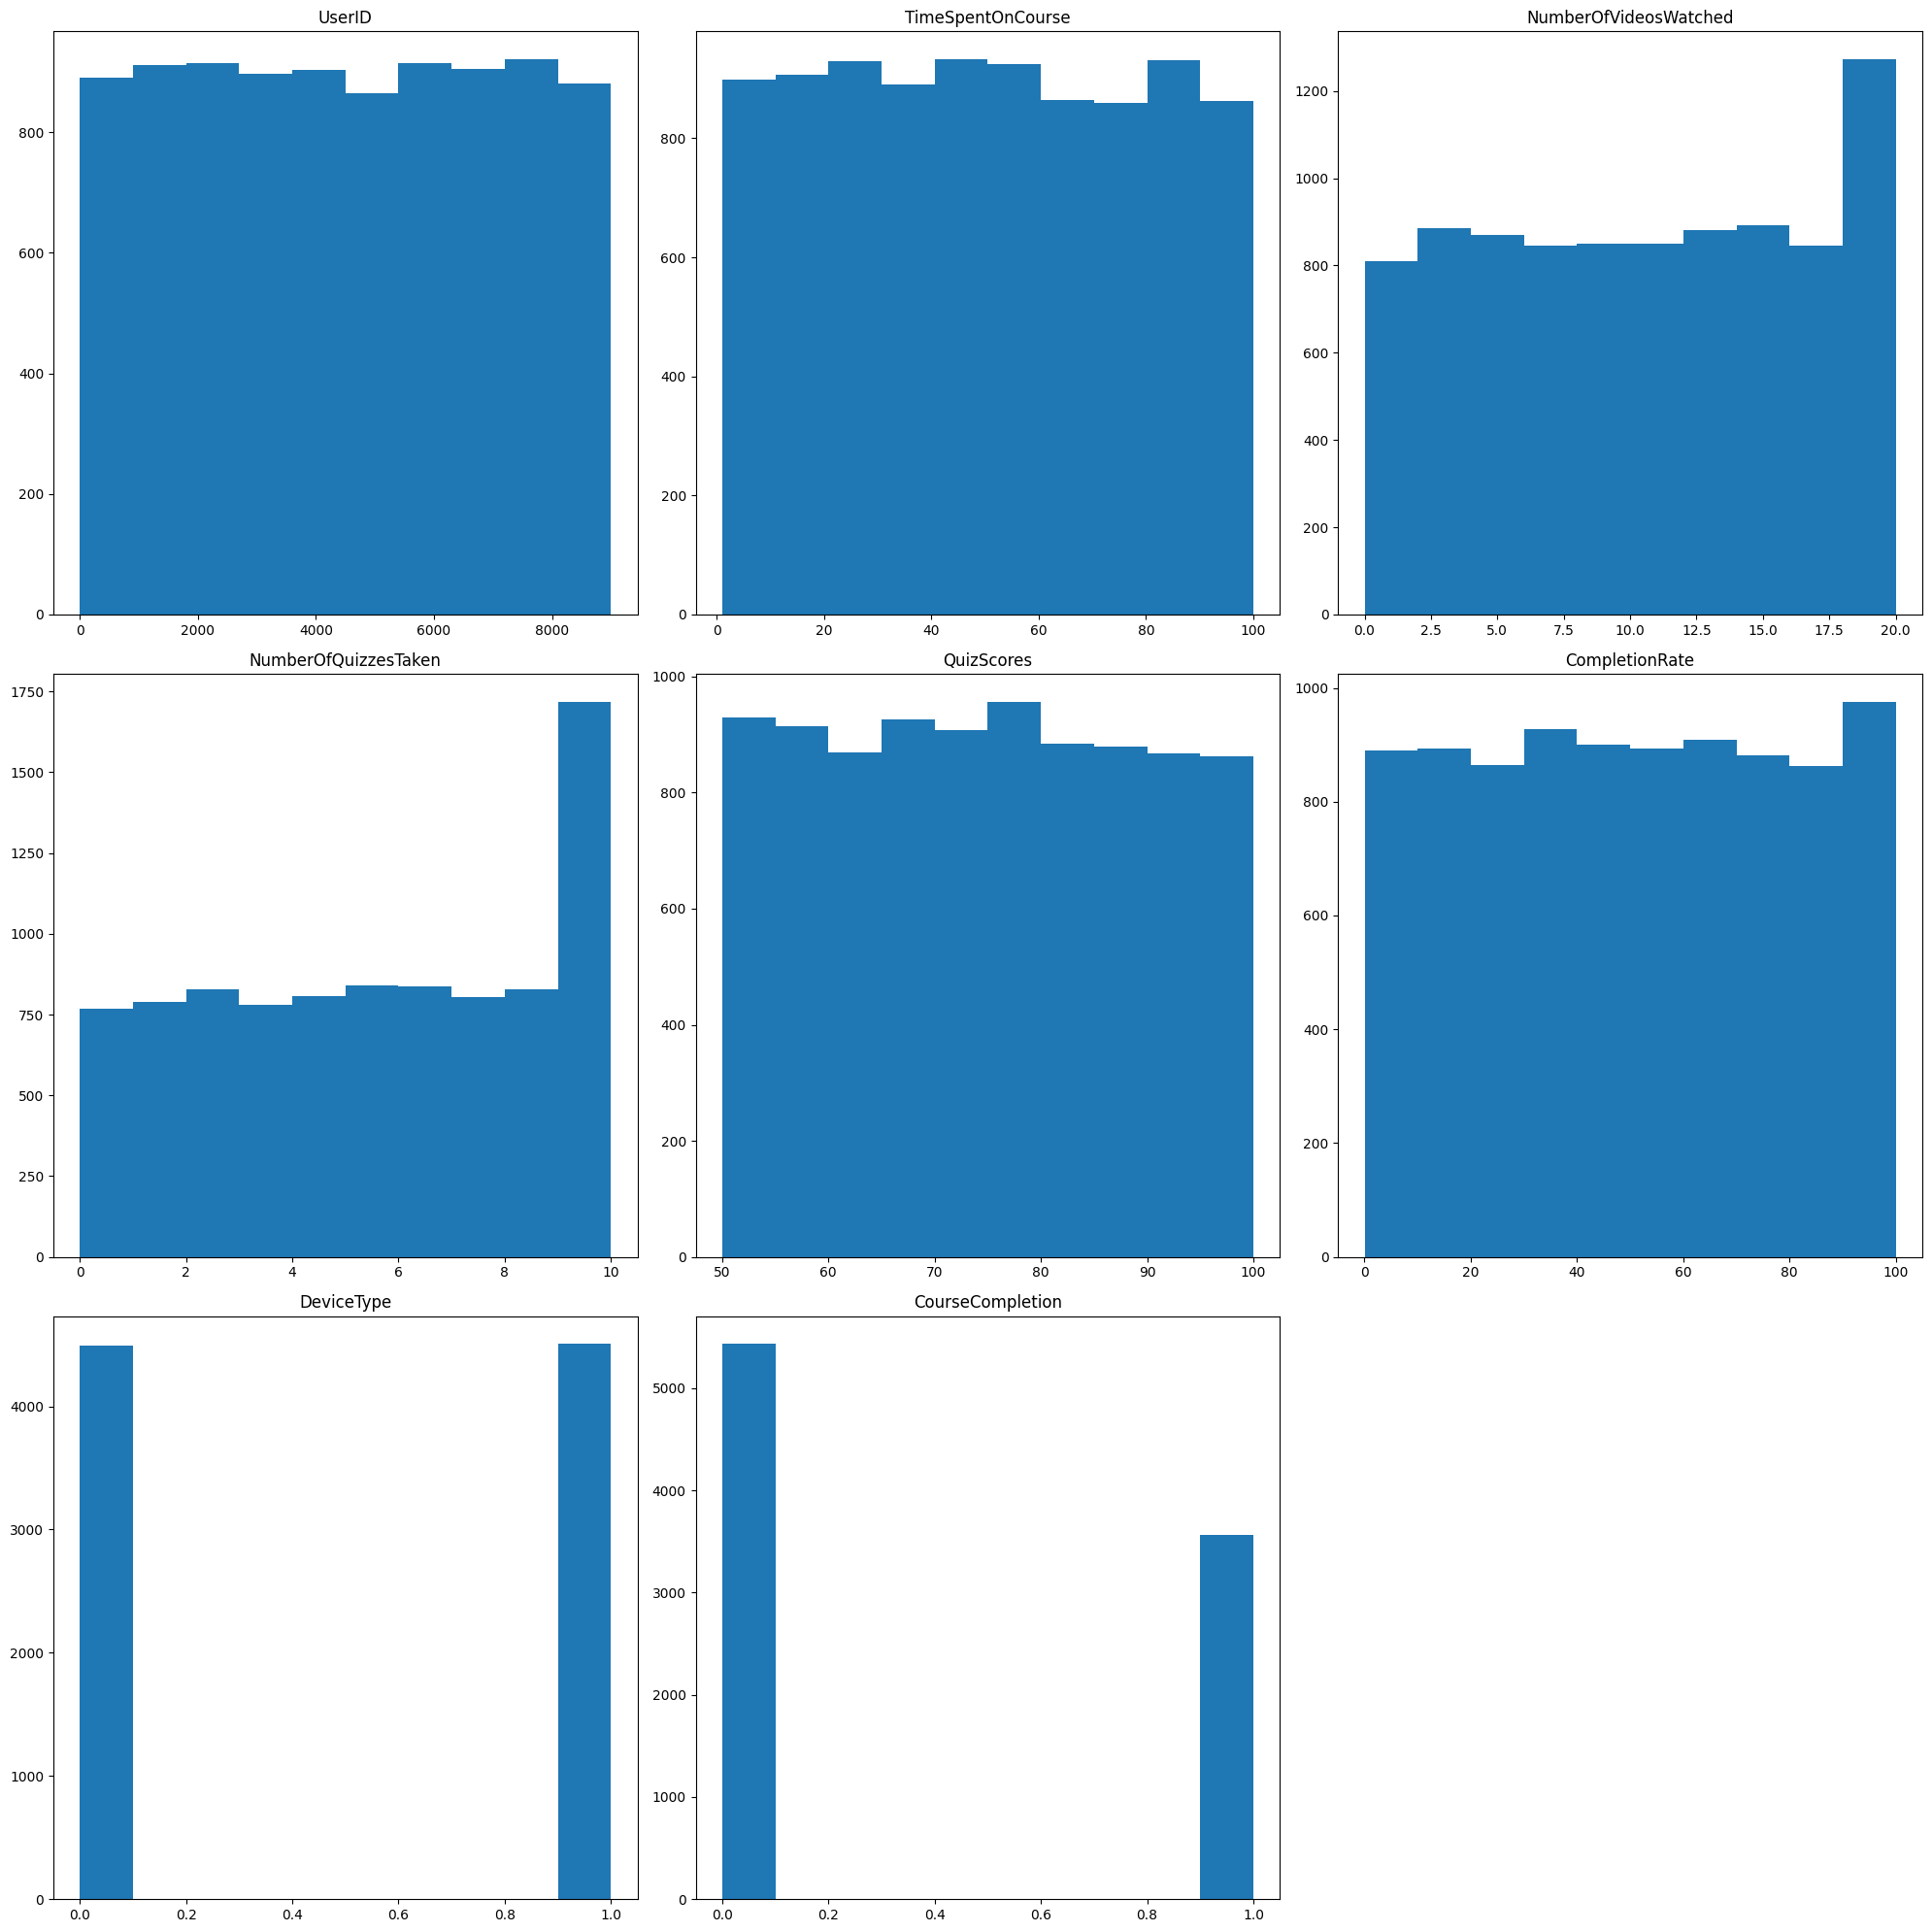

In [53]:
plt.figure(figsize=(20,20))
for i,col in enumerate(continuos_data.columns):
    plt.subplot(3,3, i+1)
    plt.hist(online_course[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Outliers

In [56]:
def outliers(continuos_data):
    plt.figure(figsize=(20,20))
    for i,col in enumerate(continuos_data.columns):
        plt.subplot(3,3, i+1)
        plt.boxplot(continuos_data[col])
        plt.title(col)
        
    plt.tight_layout()
    plt.show()
        

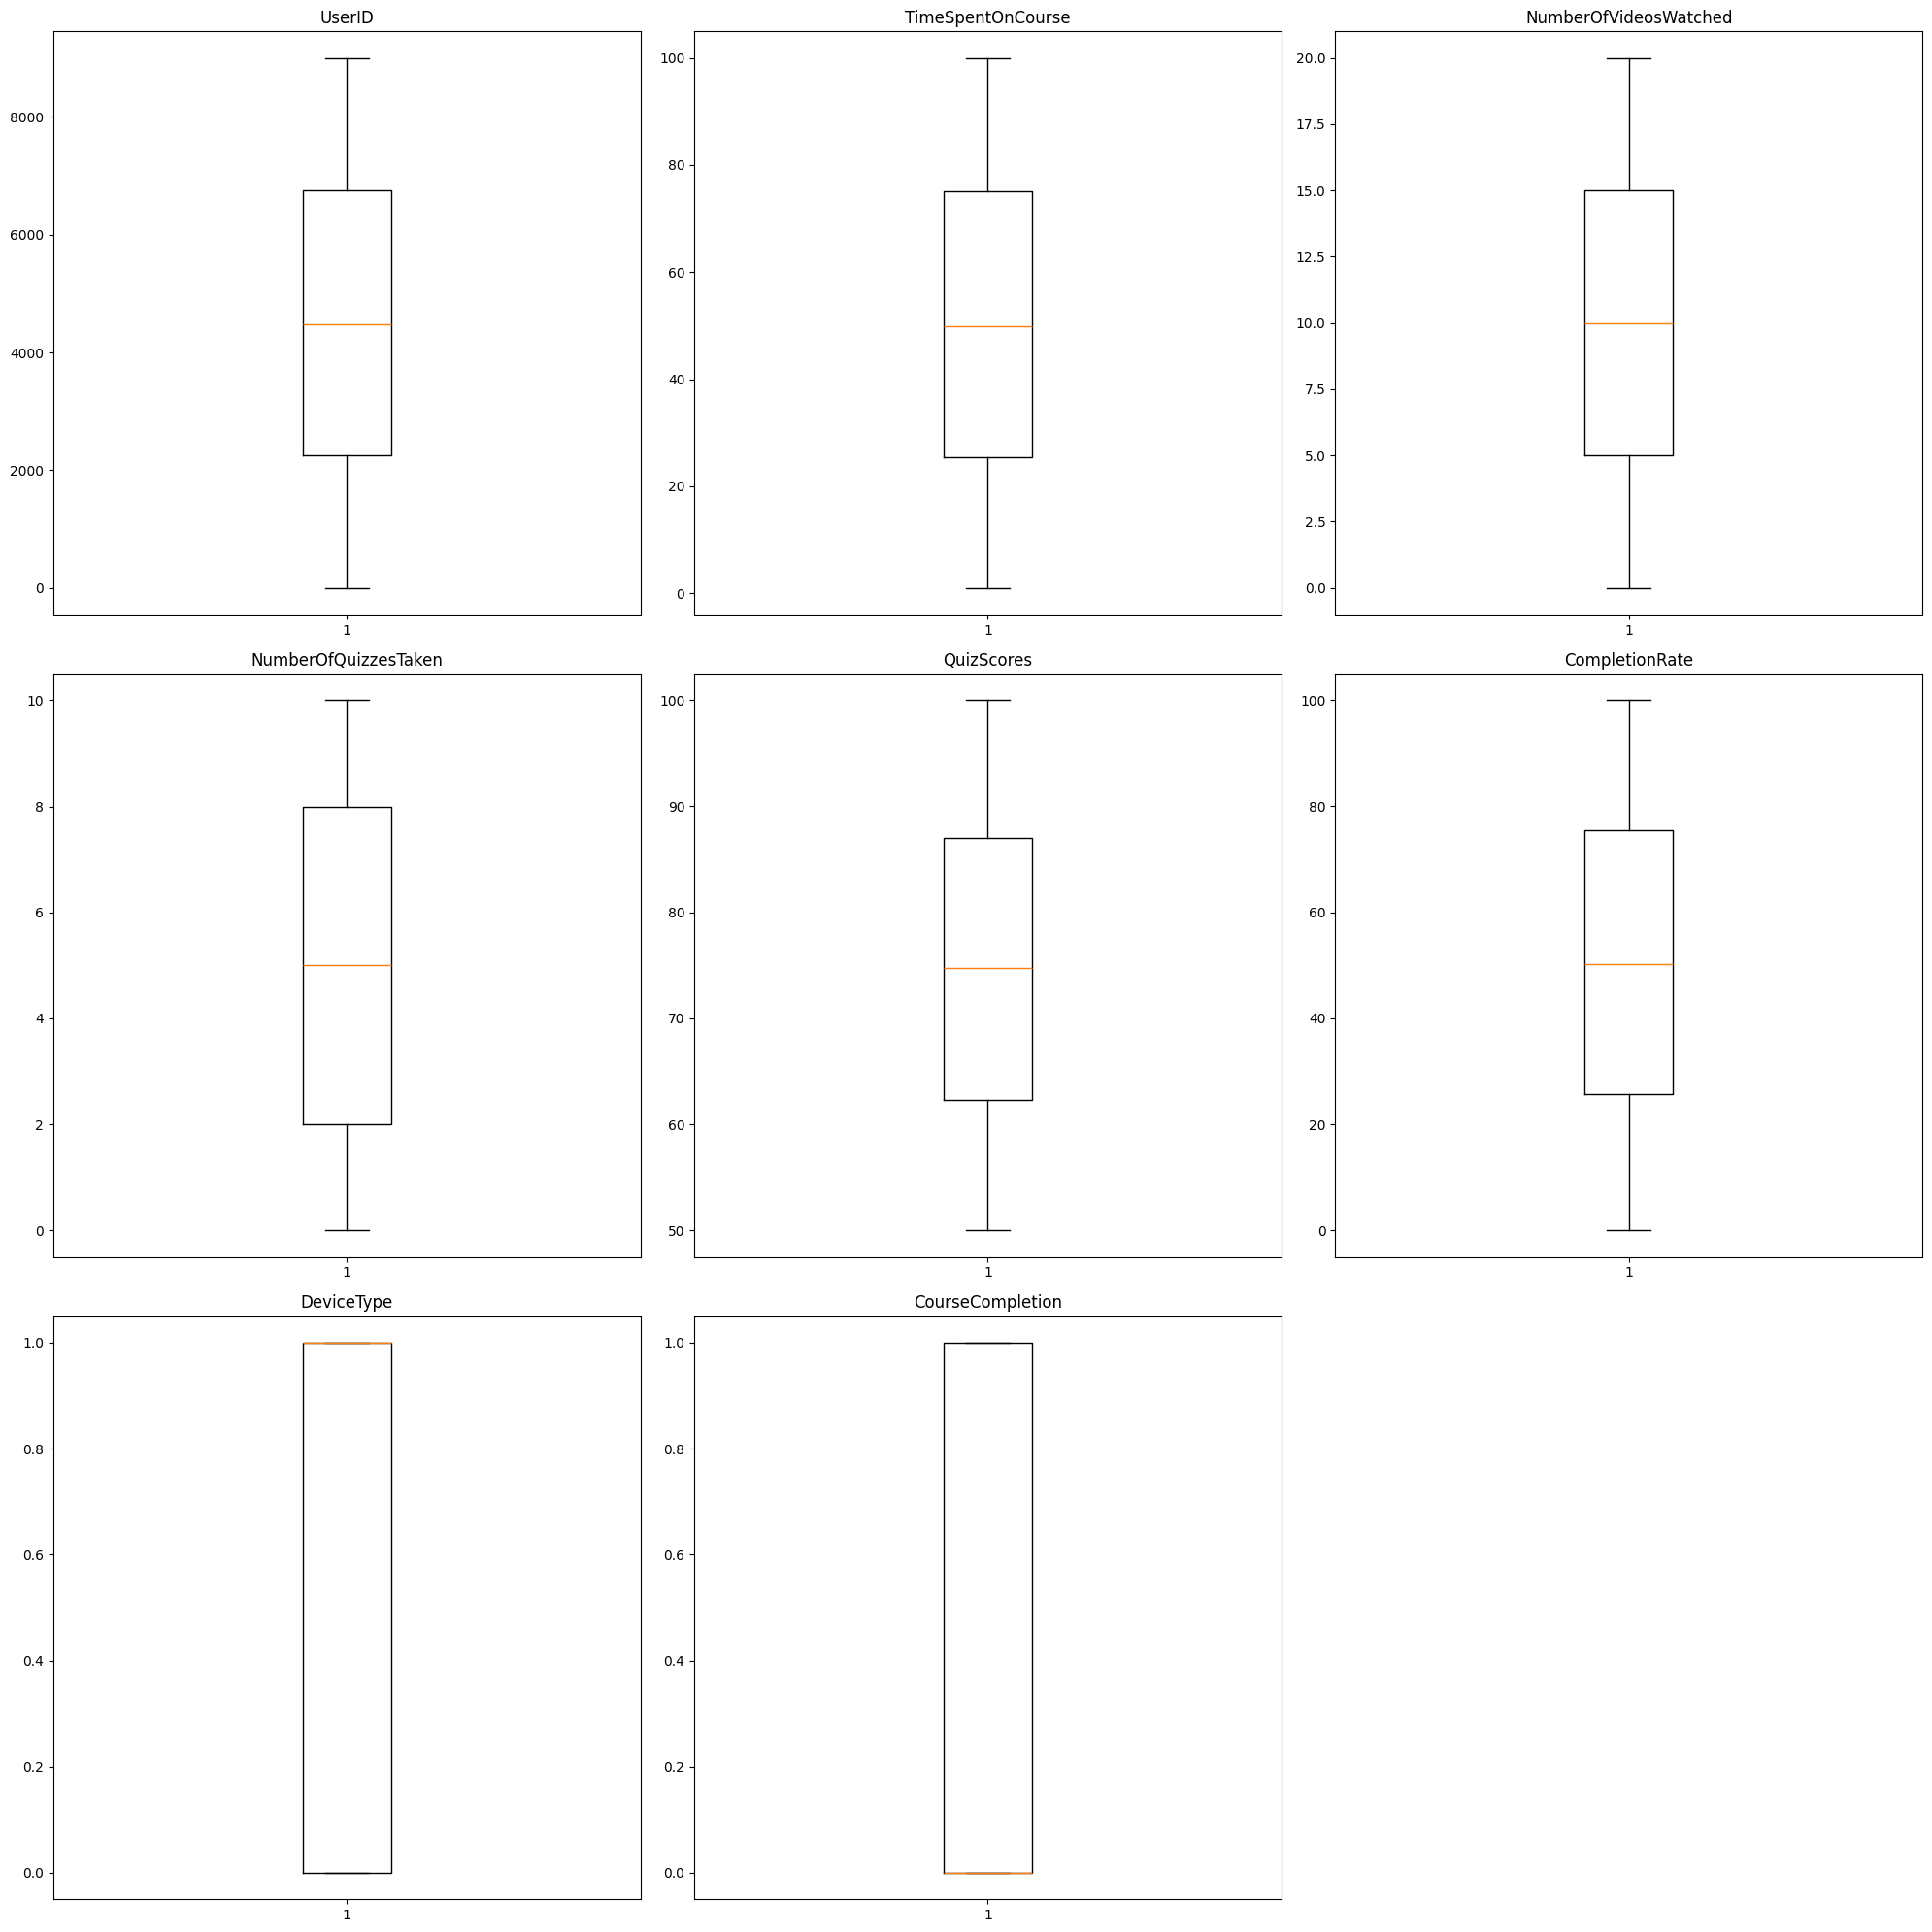

In [57]:
outliers(continuos_data)

- this dataset has no outliers 